In [1]:
import matplotlib.pyplot as plt
import metpy.calc as mpcalc
from metpy.interpolate import cross_section
from metpy.units import units
import numpy as np
from scipy.ndimage import gaussian_filter
import xarray as xr

In [3]:
# Open each dataset from 00 to 09Z of NCEP FNL; change name accordingly to yours
ds1 = xr.open_dataset('US_VCS_00.nc4')
ds1 = ds1.metpy.parse_cf().squeeze()
ds2 = xr.open_dataset('US_VCS_03.nc4')
ds2 = ds2.metpy.parse_cf().squeeze()
ds3 = xr.open_dataset('US_VCS_06.nc4')
ds3 = ds3.metpy.parse_cf().squeeze()
ds4 = xr.open_dataset('US_VCS_09.nc4')
ds4 = ds4.metpy.parse_cf().squeeze()

In [9]:
#------------------------US_VCS_00.nc4------------------------#

lon1 = ds1['longitude'] * units.degrees_east
lat1 = ds1['latitude'] * units.degrees_north
pres1 = ds1['isobaric3'] * units('Pa').to('hPa')
uwind1 = ds1['u-component_of_wind_isobaric'] * units('m/s')
vwind1 = ds1['v-component_of_wind_isobaric'] * units('m/s')
temp1 = ds1['Temperature_isobaric'] * units('K')

#------------------------US_VCS_03.nc4------------------------#

lon2 = ds2['longitude'] * units.degrees_east
lat2 = ds2['latitude'] * units.degrees_north
pres2 = ds2['isobaric3'] * units('Pa').to('hPa')
uwind2 = ds2['u-component_of_wind_isobaric'] * units('m/s')
vwind2 = ds2['v-component_of_wind_isobaric'] * units('m/s')
temp2 = ds2['Temperature_isobaric'] * units('K')

#------------------------US_VCS_06.nc4------------------------#

lon3 = ds3['longitude'] * units.degrees_east
lat3 = ds3['latitude'] * units.degrees_north
pres3 = ds3['isobaric3'] * units('Pa').to('hPa')
uwind3 = ds3['u-component_of_wind_isobaric'] * units('m/s')
vwind3 = ds3['v-component_of_wind_isobaric'] * units('m/s')
temp3 = ds3['Temperature_isobaric'] * units('K')

#------------------------US_VCS_09.nc4------------------------#

lon4 = ds4['longitude'] * units.degrees_east
lat4 = ds4['latitude'] * units.degrees_north
pres4 = ds4['isobaric4'] * units('Pa').to('hPa')
uwind4 = ds4['u-component_of_wind_isobaric'] * units('m/s')
vwind4 = ds4['v-component_of_wind_isobaric'] * units('m/s')
temp4 = ds4['Temperature_isobaric'] * units('K')

In [10]:
#------------------------Compute for ds1's grid spacing------------------------#

dx1, dy1 = mpcalc.lat_lon_grid_deltas(lon1, lat1)
dx1 = dx1[None, :]
dy1 = dy1[None, :]

hgt1 = mpcalc.pressure_to_height_std(pres1)

pot_temp1 = mpcalc.potential_temperature(pres1, temp1)

#------------------------Compute for ds2's grid spacing------------------------#

dx2, dy2 = mpcalc.lat_lon_grid_deltas(lon2, lat2)
dx2 = dx2[None, :]
dy2 = dy2[None, :]

hgt2 = mpcalc.pressure_to_height_std(pres2)

pot_temp2 = mpcalc.potential_temperature(pres2, temp2)

#------------------------Compute for ds3's grid spacing------------------------#

dx3, dy3 = mpcalc.lat_lon_grid_deltas(lon3, lat3)
dx3 = dx3[None, :]
dy3 = dy3[None, :]

hgt3 = mpcalc.pressure_to_height_std(pres3)

pot_temp3 = mpcalc.potential_temperature(pres3, temp3)

#------------------------Compute for ds4's grid spacing------------------------#

dx4, dy4 = mpcalc.lat_lon_grid_deltas(lon4, lat4)
dx4 = dx4[None, :]
dy4 = dy4[None, :]

hgt4 = mpcalc.pressure_to_height_std(pres4)

pot_temp4 = mpcalc.potential_temperature(pres4, temp4)

In [11]:
# Compute for Baroclinic Potential Vorticity to each dataset
pv1 = mpcalc.potential_vorticity_baroclinic(pot_temp1, pres1, u=uwind1, v=vwind1, dx=dx1, dy=dy1, 
                                            latitude=lat1, longitude=lon1)

pv2 = mpcalc.potential_vorticity_baroclinic(pot_temp2, pres2, u=uwind2, v=vwind2, dx=dx2, dy=dy2, 
                                            latitude=lat2, longitude=lon2)

pv3 = mpcalc.potential_vorticity_baroclinic(pot_temp3, pres3, u=uwind3, v=vwind3, dx=dx3, dy=dy3, 
                                            latitude=lat3, longitude=lon3)

pv4 = mpcalc.potential_vorticity_baroclinic(pot_temp4, pres4, u=uwind4, v=vwind4, dx=dx4, dy=dy4, 
                                            latitude=lat4, longitude=lon4) 

In [12]:
start = (10, 115)
end = (20, 125)

#------------------------Apply Cross Section to ds1------------------------#

cross1 = cross_section(ds1, start, end).set_coords(('latitude', 'longitude'))
cross_lats1 = cross1['latitude']
cross_lons1 = cross1['longitude']
cross_pres1 = cross1['isobaric3'] * units('Pa').to('hPa')

cross_pv1 = cross_section(pv1, start, end)

cross_theta1 = cross_section(pot_temp1, start, end)
cross_theta1 = gaussian_filter(cross_theta1, sigma=1.5) * units('K')

#------------------------Apply Cross Section to ds2------------------------#

cross2 = cross_section(ds2, start, end).set_coords(('latitude', 'longitude'))
cross_lats2 = cross2['latitude']
cross_lons2 = cross2['longitude']
cross_pres2 = cross2['isobaric3'] * units('Pa').to('hPa')

cross_pv2 = cross_section(pv2, start, end)

cross_theta2 = cross_section(pot_temp2, start, end)
cross_theta2 = gaussian_filter(cross_theta2, sigma=1.5) * units('K')

#------------------------Apply Cross Section to ds3------------------------#

cross3 = cross_section(ds3, start, end).set_coords(('latitude', 'longitude'))
cross_lats3 = cross3['latitude']
cross_lons3 = cross3['longitude']
cross_pres3 = cross3['isobaric3'] * units('Pa').to('hPa')

cross_pv3 = cross_section(pv3, start, end)

cross_theta3 = cross_section(pot_temp3, start, end)
cross_theta3 = gaussian_filter(cross_theta3, sigma=1.5) * units('K')

#------------------------Apply Cross Section to ds4------------------------#

cross4 = cross_section(ds4, start, end).set_coords(('latitude', 'longitude'))
cross_lats4 = cross4['latitude']
cross_lons4 = cross4['longitude']
cross_pres4 = cross4['isobaric4'] * units('Pa').to('hPa')

cross_pv4 = cross_section(pv4, start, end)

cross_theta4 = cross_section(pot_temp4, start, end)
cross_theta4 = gaussian_filter(cross_theta4, sigma=1.5) * units('K')

In [13]:
pv1_range = np.arange(-0.000000750, 0.000001505, 0.000000005)
pv2_range = np.arange(-0.000000350, 0.000001155, 0.000000005)
pv3_range = np.arange(-0.000000250, 0.000001005, 0.000000005)
pv4_range = np.arange(-0.000000250, 0.000001005, 0.000000005)

/tmp/ipykernel_5357/3850248279.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.arange(1000, 400, -100)) # limits to 500 hPa
/tmp/ipykernel_5357/3850248279.py:67: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(np.arange(1000, 400, -100)) # limits to 500 hPa
/tmp/ipykernel_5357/3850248279.py:97: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax3.set_yticklabels(np.arange(1000, 400, -100)) # limits to 500 hPa
/tmp/ipykernel_5357/3850248279.py:131: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax4.set_yticklabels(np.arange(1000, 400, -100)) # limits to 500 hPa


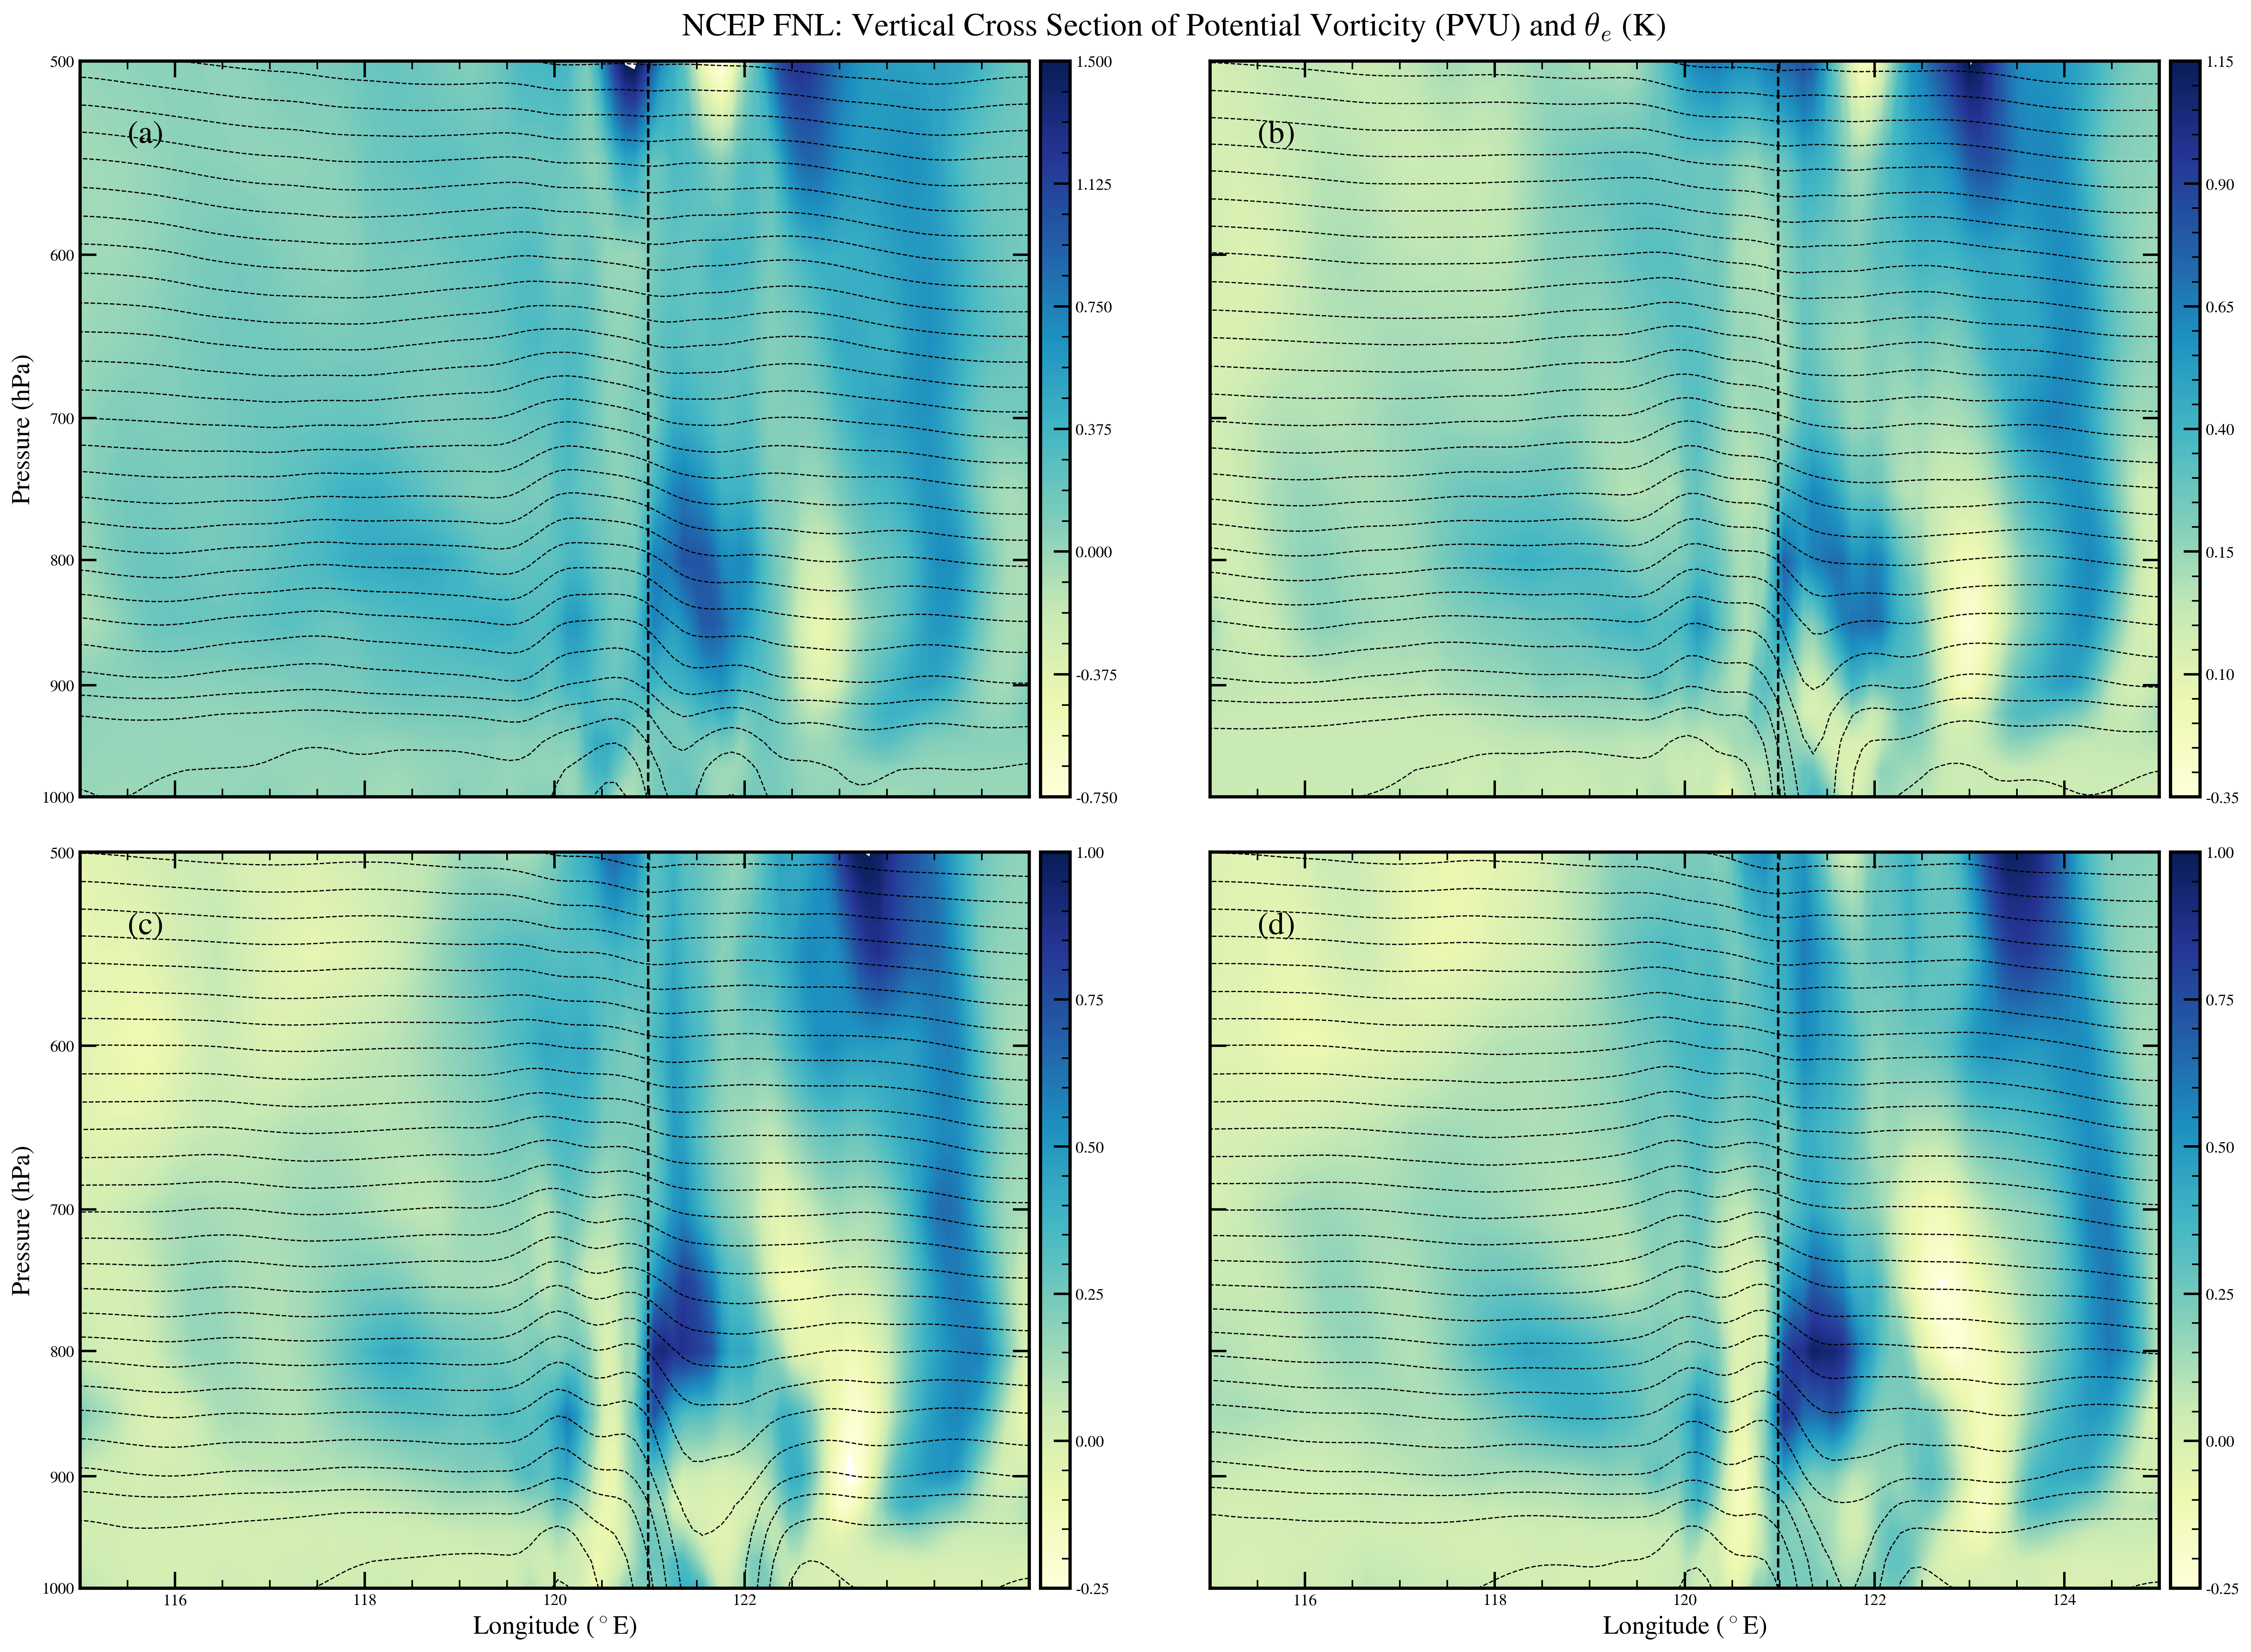

In [18]:
# Annotate the location of Metropolis
manila_lon = [120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842,
              120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842,
              120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 
              120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842, 120.9842] # Longitude

manila_lat = [14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995,
              14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995,
              14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 
              14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995, 14.5995] # Latitude

# Define the figure object and primary axes
fig = plt.figure(figsize=(25, 17))
gs = fig.add_gridspec(2, 2, hspace=0.075, wspace=0)
(ax1, ax2), (ax3, ax4) = gs.subplots(sharex='col', sharey='row')

#-------------------------------------00Z

pv_contour1 = ax1.contourf(cross_lons1, cross_pres1, cross_pv1, levels=pv1_range, cmap='YlGnBu')
cbar1 = plt.colorbar(pv_contour1, ax=ax1, orientation='vertical', pad=0.01, aspect=25)
ticks1 = [-0.000000750, -0.000000375, 0.000000000, 0.000000375, 0.000000750, 
         0.000001125, 0.000001500]
cbar1.ax.set_yticks(ticks1)
cbar1.ax.set_yticklabels(['-0.750','-0.375', '0.000', '0.375', '0.750', '1.125', '1.500'])
cbar1.ax.minorticks_on()
cbar1.ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
cbar1.ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')
cbar1.ax.yaxis.get_offset_text().set_visible(False)

ax1.contour(cross_lons1, cross_pres1, cross_theta1, levels=np.arange(295, 380, 1), colors='k',
            linestyles='--', linewidths=0.75)

ax1.set_yscale('symlog')
ax1.set_yticklabels(np.arange(1000, 400, -100)) # limits to 500 hPa
ax1.set_ylim(1000, 500)
ax1.set_yticks(np.arange(1000, 400, -100)) # limits to 500 hPa

ax1.minorticks_on()
ax1.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
ax1.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

ax1.plot(manila_lon, cross_pres1, color='k', ls='--') # If you're doing cross section in Lons
ax1.text(115.5, 540, '(a)', fontsize=20)

#ax1.plot(manila_lat, cross_pres2, color='k', ls='--') # If you're doing cross section in Lats
#ax1.text(10.5, 540, '(a)', fontsize=20)

ax1.set_ylabel('Pressure (hPa)', fontsize=16)

#-------------------------------------03Z

pv_contour2 = ax2.contourf(cross_lons2, cross_pres2, cross_pv2, levels=pv2_range, cmap='YlGnBu')
cbar2 = plt.colorbar(pv_contour2, ax=ax2, orientation='vertical', pad=0.01, aspect=25)
ticks2 = [-0.000000350, -0.00000010, 0.00000015, 0.00000040, 0.00000065, 0.00000090, 0.00000115]
cbar2.ax.set_yticks(ticks2)
cbar2.ax.set_yticklabels(['-0.35', '0.10', '0.15', '0.40', '0.65', 
                          '0.90', '1.15'])
cbar2.ax.minorticks_on()
cbar2.ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
cbar2.ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')
cbar2.ax.yaxis.get_offset_text().set_visible(False)

ax2.contour(cross_lons2, cross_pres2, cross_theta2, levels=np.arange(300, 385, 1), colors='k',
            linestyles='--', linewidths=0.75)

ax2.set_yscale('symlog')
ax2.set_yticklabels(np.arange(1000, 400, -100)) # limits to 500 hPa
ax2.set_ylim(1000, 500)
ax2.set_yticks(np.arange(1000, 400, -100)) # limits to 500 hPa

ax2.minorticks_on()
ax2.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
ax2.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

ax2.plot(manila_lon, cross_pres2, color='k', ls='--') # If you're doing cross section in Lons
ax2.text(115.5, 540, '(b)', fontsize=20)

#ax2.plot(manila_lat, cross_pres2, color='k', ls='--') # If you're doing cross section in Lats
#ax2.text(10.5, 540, '(b)', fontsize=20)

#-------------------------------------06Z

pv_contour3 = ax3.contourf(cross_lons3, cross_pres3, cross_pv3, levels=pv3_range, cmap='YlGnBu')
cbar3 = plt.colorbar(pv_contour3, ax=ax3, orientation='vertical', pad=0.01, aspect=25)
ticks3 = [-0.00000025, 0.00000000, 0.00000025, 0.00000050, 0.00000075, 0.00000100]
cbar3.ax.set_yticks(ticks3)
cbar3.ax.set_yticklabels(['-0.25', '0.00', '0.25', '0.50', '0.75', '1.00'])
cbar3.ax.minorticks_on()
cbar3.ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
cbar3.ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')
cbar3.ax.yaxis.get_offset_text().set_visible(False)

ax3.contour(cross_lons3, cross_pres3, cross_theta3, levels=np.arange(295, 380, 1), colors='k',
            linestyles='--', linewidths=0.75)

ax3.set_yscale('symlog')
ax3.set_yticklabels(np.arange(1000, 400, -100)) # limits to 500 hPa
ax3.set_ylim(1000, 500)
ax3.set_yticks(np.arange(1000, 400, -100)) # limits to 500 hPa
ax3.set_xticks(ax3.get_xticks()[1:5]) # Uncomment for Latitudes

ax3.minorticks_on()
ax3.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
ax3.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

ax3.plot(manila_lon, cross_pres3, color='k', ls='--') # If you're doing cross section in Lons
ax3.text(115.5, 540, '(c)', fontsize=20)

#ax3.plot(manila_lat, cross_pres2, color='k', ls='--') # If you're doing cross section in Lats
#ax3.text(10.5, 540, '(c)', fontsize=20)

ax3.set_ylabel('Pressure (hPa)', fontsize=16)
ax3.set_xlabel('Longitude ($^\circ$E)', fontsize=16)
#ax3.set_xlabel('Latitude ($^\circ$N)', fontsize=16)

#-------------------------------------09Z

pv_contour4 = ax4.contourf(cross_lons4, cross_pres4, cross_pv4, levels=pv4_range, cmap='YlGnBu')
cbar4 = plt.colorbar(pv_contour4, ax=ax4, orientation='vertical', pad=0.01, aspect=25)
ticks4 = [-0.00000025, 0.00000000, 0.00000025, 0.00000050, 0.00000075, 0.00000100]
cbar4.ax.set_yticks(ticks4)
cbar4.ax.set_yticklabels(['-0.25', '0.00', '0.25', '0.50', '0.75', '1.00'])
cbar4.ax.minorticks_on()
cbar4.ax.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
cbar4.ax.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

ax4.contour(cross_lons4, cross_pres4, cross_theta4, levels=np.arange(295, 380, 1), colors='k',
            linestyles='--', linewidths=0.75)

ax4.set_yscale('symlog')
ax4.set_yticklabels(np.arange(1000, 400, -100)) # limits to 500 hPa
ax4.set_ylim(1000, 500)
ax4.set_yticks(np.arange(1000, 400, -100)) # limits to 500 hPa
#ax4.set_xticks(ax4.get_xticks()[1:5]) # Uncomment for Latitudes

ax4.minorticks_on()
ax4.tick_params(which='major', length=10, width=1.5, top=True, right=True, direction='in')
ax4.tick_params(which='minor', length=5, width=1, top=True, right=True, direction='in')

ax4.plot(manila_lon, cross_pres4, color='k', ls='--') # If you're doing cross section in Lons
ax4.text(115.5, 540, '(d)', fontsize=20)

#ax4.plot(manila_lat, cross_pres4, color='k', ls='--') # If you're doing cross section in Lats
#ax4.text(10.5, 540, '(d)', fontsize=20)

ax4.set_xlabel('Longitude ($^\circ$E)', fontsize=16)
#ax4.set_xlabel('Latitude ($^\circ$N)', fontsize=16)

#-------------------------------------

plt.suptitle("NCEP FNL: Vertical Cross Section of Potential Vorticity (PVU) and $\\theta$$_e$ (K)", y=0.905, fontsize=20)

plt.rcParams['axes.linewidth'] = 2
plt.rcParams['figure.dpi'] = 300
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.savefig('BC_Lon_VCS_PVU_ThetaE.jpg', bbox_inches="tight")
plt.show()

# Rename to BC_Lat_VCS_PVU_ThetaE if Meriodional/Latitude cross section instead.